# 上机实验：决策树

## 任务1：分支节点的选择方法

现有一个数据集 weekend.txt，目标是根据一个人的特征来预测其周末是否出行。

所有特征均为二元特征，取值为 0 或 1，其中“status”（目标特征也是类别）表示用户的周末是否出行，1 表示出行，0 表示不出行，“marriageStatus”表示申请人是否已婚、“hasChild”表示申请人是否有小孩、“hasAppointment”表示申请人是否有约、“weather”表示天气是否晴朗。

已知信息熵和信息增益的公式为：

$$\text{Entropy}(D)=-\sum_{k=1}^{C}p_k \cdot log_2(p_k)$$

$$\text{InfoGain}(D, a)=\text{Entropy}(D)-\sum_{v=1}^{V}\frac{|D^v|}{|D|} \cdot\text{Entropy}(D^v)$$

请完成以下三个内容：

- 请自定义函数 cal_entropy(data, feature_name)计算数据集data关于feature_name的信息熵。输入参数 data 为 DataFrame，feature_name 为目标特征(或类别)的名称；

- 请调用 cal_entropy() 函数计算决策树分支之前的信息熵，保存为 data_entropy；

- 请自定义函数 cal_infoGain(data, base_entropy) 计算 weekend.txt 中各个特征的信息增益，保存为列表 infogains，并选择信息增益最大的分支节点 best_feature。


> 补全代码

In [2]:
import numpy as np
import pandas as pd


weekend_data = pd.read_table('weekend.txt', sep=' ')


def cal_entropy(data: pd.DataFrame, feature_name: str) -> float:
    '''自定义计算信息熵(entropy)的函数
    data        : 当前结点的数据集
    featue_name : 当前结点的属性名
    '''
    
    entropy = 0
    
    ## 获取data的样本数num
    num = data.shape[0]
    
    ## 使用value_counts()函数获取目标特征`feature_name`取值的频数统计信息freq_stats
    freq_stats = data[feature_name].value_counts()
    
    print(freq_stats)

    ## 遍历目标特征的不同取值频数,计算entropy
    for index in range(len(freq_stats)):
        
        ## 获取具体的取值频数freq
        freq = freq_stats[index]
        
        ## 通过频数计算类别概率prob，计算entropy
        ## 请在下方补全代码

        # 获取具体的取值频数freq
        freq = freq_stats[index]
        
        # 通过频数计算类别概率prob，计算entropy
        prob = freq / num
        entropy -= prob * np.log2(prob)


    return round(entropy, 3)


def cal_infoGain(data: pd.DataFrame, base_entropy):
    '''自定义计算信息增益(entropy_gain)的函数
    data         : 当前结点的数据集
    base_entropy : 当前结点的信息熵
    '''
    
    ## 声明数据集特征的信息增益列表
    infogain_list = []
    
    ## 获取数据集的样本数nums, 维度dims
    # ______________________________
    nums, dims = data.shape[0], data.shape[1]
    
    ## 获取数据集的特征名称，类型为list
    feature_list = list(data.columns.values)
    ## 移除标签名称
    feature_list.remove('status')
    
    ## 遍历每个特征
    for feature in feature_list:
        
        ## 保存feature不同取值的加权熵
        sub_entropy = 0
        
        ## 切片数据集，获取特征feature的数据记录feature_data 
        feature_data = data[feature]
        
        ## 使用value_count()函数获取特征feature取值的统计信息freq_stats
        freq_stats = feature_data.value_counts()

        ## 计算信息增益
        ## 请在下方补全代码
        
        # 计算每个特征的加权熵
        for value, count in freq_stats.items():
            # 获取每个特征取值对应的数据子集
            subset = data[data[feature] == value]
            # 计算子集的熵
            subset_entropy = cal_entropy(subset, 'status')
            # 加权累加到 sub_entropy 中
            sub_entropy += (count / nums) * subset_entropy
        
        # 计算信息增益
        infogain = base_entropy - sub_entropy


        ## infogain取值保留小数点后4位，保存到infogain_list中
        infogain_list.append(round(infogain, 4))
    
    ## 获取infogain_list的最大值所在的位置索引max_index
    ## 根据max_index在feature_list中找到特征的名称best_feature
    ## 请在下方补全代码
    max_index = infogain_list.index(max(infogain_list))
    best_feature = feature_list[max_index]

    
    ## 返回结果
    return infogain_list, best_feature


data_entropy = cal_entropy(weekend_data, 'status')
infogains, best_feature = cal_infoGain(weekend_data, data_entropy)


print(f'信息增益列表：{infogains}\n最优的分支节点名称：{best_feature}')

1    8
0    2
Name: status, dtype: int64
1    5
0    1
Name: status, dtype: int64
1    3
0    1
Name: status, dtype: int64
1    5
0    1
Name: status, dtype: int64
1    3
0    1
Name: status, dtype: int64
1    6
0    1
Name: status, dtype: int64
1    2
0    1
Name: status, dtype: int64
1    7
0    1
Name: status, dtype: int64
1    1
0    1
Name: status, dtype: int64
信息增益列表：[0.0076, 0.0076, 0.0322, 0.0868]
最优的分支节点名称：weather


> 期望输出：

![](https://ai-studio-static-online.cdn.bcebos.com/3d80a48b1b80443eae424c908401e885ea91d3cb4d3a45d698f55e4df46d84fc)


## 任务2：常见的决策树算法

现在有一份有关商品销量的数据集product.csv，数据集的离散型特征信息如下：

|特征名称|	取值说明|
| -------- | -------- |
| 天气	| 1：天气好；0：天气坏| 
| 是否周末	| 1：是；0：不是| 
| 是否有促销| 	1：有促销；0：没有促销| 
| 销量| 	1：销量高；0：销量低| 

请完成以下三个内容：
- 请根据提供的商品销量数据集 data，使用 sklearn 中的 DecisionTreeClassifier()函数构建决策树模型，模型选择分支结点的特征以Gini指数为判定准则；
- 训练模型，并对测试集test_X进行预测，将预测结果存为 pred_y，进行模型评估；
- 将构建的决策树模型进行可视化。

> 补全代码

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



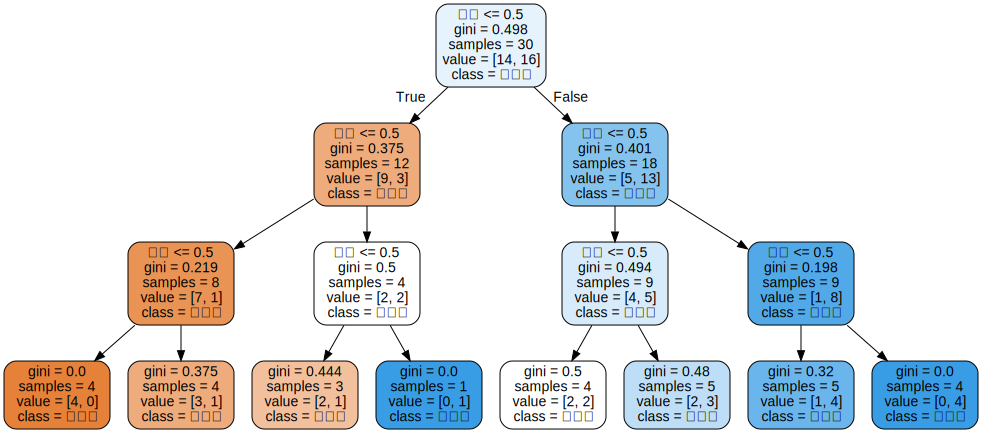

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('product.csv')

## 对数据集切片，获取除目标特征以外的其他特征的数据记录X
X = data.iloc[:, :-1]

## 对数据集切片，获取目标特征`销量`的数据记录y
y = data.iloc[:, -1]

## 使用train_test_split函数划分训练集train_X, train_y和测试集test_X, test_y
## 测试集所占比例为0.1,random_state为0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .1, random_state = 0)

## 构建分支节点选择方法为基尼指数的决策树模型tree_model，进行模型训练、测试与性能评估
## 请在下方补全代码
tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(train_X, train_y)
pred_y = tree_model.predict(test_X)
print(classification_report(test_y, pred_y))

## 决策树可视化
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model
                                ,out_file=None
                                ,feature_names= ["天气","周末","促销"]
                                ,class_names=["销量低","销量高"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

> 期望输出：

![](https://ai-studio-static-online.cdn.bcebos.com/f7c9f4d97660416b9ac354a1bcd6c87efcb7a0958cfa4579bf70a83d01ee64f7)
![](https://ai-studio-static-online.cdn.bcebos.com/eb46fe19bf43414290f904042a511f25140e1908a2eb4c2e81c52450f1de68bd)



## 任务3：利用任务1的cal_infoGain函数自行实现ID3决策树算法

In [4]:
# 请在下面完成
from collections import Counter, defaultdict


class Node:
    def __init__(self, attribute=None, children=None, label=None):
        self.attribute = attribute  # 当前结点属性
        self.children = children    # 子节点字典，value: Node
        self.label = label          # 叶结点标签


class MyDecisionTreeClassifier:
    def __init__(self, criterion='entropy'):
        self.criterion = criterion
        self.tree = None


    def fit(self, X_train, y_train):
        self.tree = self._build_tree(X_train, y_train)


    def _build_tree(self, X: pd.DataFrame, y: pd.Series):
        # 如果数据集为空，返回 None
        if len(y) == 0:
            return None

        # 如果标签相同，返回叶子结点
        if len(set(y)) == 1:
            return Node(label=y.iloc[0])

        # 选择最佳划分属性
        best_attribute, best_gain = self._choose_best_attribute(X, y)

        # 如果没有合适的划分，返回叶子结点
        if best_gain == 0:
            return Node(label=Counter(y).most_common(1)[0][0])

        # 构建叶子结点
        children = {}
        for value in X[best_attribute].unique():
            # 根据属性值划分数据集
            value_indices = (X[best_attribute] == value)
            X_subset = X.loc[value_indices]
            y_subset = y.loc[value_indices]

            # 递归构建叶子结点
            child_node = self._build_tree(X_subset, y_subset)
            children[value] = child_node

        # 返回内叶子结点
        return Node(attribute=best_attribute, children=children)


    def _choose_best_attribute(self, X, y):
        best_gain = 0
        best_attribute = None

        # 遍历所有特征
        for attribute in X.columns:
            # 获取当前特征的唯一值
            values = X[attribute].unique()

            # 划分数据集
            subsets = defaultdict(list)
            for value in values:
                indices = (X[attribute] == value)
                y_subset = y.loc[indices]
                subsets[value] = y_subset

            gain = self._calculate_gain(y, subsets)

            if gain > best_gain:
                best_gain = gain
                best_attribute = attribute

        return best_attribute, best_gain


    def _calculate_gain(self, y, subsets):
        # 根据选择的标准计算增益
        if self.criterion == 'entropy':
            gain = self._entropy_gain(y, subsets)
        elif self.criterion == 'log_loss':
            gain = self._ratio_gain(y, subsets)
        elif self.criterion == 'gini':
            gain = self._gini_gain(y, subsets)
        else:
            raise ValueError("Unsupported criterion")
        return gain


    def _calculate_entropy(self, y: pd.Series) -> float:
        counts = Counter(y)
        total = len(y)
        entropy = 0

        for count in counts.values():
            prob = count / total
            entropy -= prob * np.log2(prob)

        return entropy


    def _entropy_gain(self, y: pd.Series, subsets: dict) -> float:
        entropy = self._calculate_entropy(y)
        child_entropy = np.sum([len(subset) / len(y) * self._calculate_entropy(subset) for subset in subsets.values()])        
        return entropy - child_entropy


    def _ratio_gain(self, y: pd.Series, subsets: dict) -> float:
        gain = self._entropy_gain(y, subsets)
        iv = np.sum([-len(subset) / len(y) * np.log2(len(subset) / len(y)) for subset in subsets.values()])
        return 0 if iv == 0 else gain / iv
    

    def _gini_gain(self, y: pd.Series, subsets: dict) -> float:
        gini_index = 0
        for subset in subsets.values():
            gini_index += len(subset) / len(y) * (1 - np.sum([(len(subset.loc[subset == label]) / len(subset)) ** 2 for label in subset.unique()]))
        return -gini_index


    def predict(self, X_test) -> np.array:
        y_pred = [self._predict_single_sample(sample) for _, sample in X_test.iterrows()]
        return np.array(y_pred)


    def _predict_single_sample(self, sample):
        node = self.tree
        while node.label is None:
            value = sample[node.attribute]

            # 如果叶子结点为空，返回子结点中最多的标签
            if value not in node.children or node.children[value] is None:
                child_labels = []

                # 仅当子节点存在且是叶节点时，获取其标签
                for child_node in node.children.values():
                    if child_node is not None and child_node.label is not None:
                        child_labels.append(child_node.label)
                
                if len(child_labels) == 0: return 0.0
                most_common_label = Counter(child_labels).most_common(1)[0][0]
                return most_common_label

            else:
                node = node.children[value]

        return node.label

In [5]:
from sklearn.metrics import accuracy_score

clf_my = MyDecisionTreeClassifier(criterion='entropy')
clf_my.fit(train_X, train_y)
y_pred_my = clf_my.predict(test_X)
accuracy = accuracy_score(test_y, y_pred_my)
print(f'acc: {accuracy:.2f}')

acc: 0.50
